In [ ]:
pip install shap

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import shap

In [ ]:
# Load your dataset
# Assuming your dataset is named 'data.csv'
# Replace 'data.csv' with your actual dataset file name
data = pd.read_csv('/content/Data.csv')

In [ ]:
# Assuming the target variable is in a column named 'PCE'
X = data.drop('PCE', axis=1)
y = data['PCE']

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the number of folds for cross-validation
num_folds = 50

In [ ]:
# Define the K-fold cross-validator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

**Extreme Gradient Boost model**

In [ ]:
# Training the XGBoost model
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Perform K-fold cross-validation
cv_results = cross_val_score(xg_reg, X_train y_train, cv=kfold, scoring='neg_mean_squared_error')

# Print the cross-validation results
print("Cross-validation RMSE: ", np.sqrt(-cv_results.mean()))

Cross-validation RMSE:  0.007544197610358178


In [ ]:
#K-Fold Cross Validation
cv_score = cross_val_score(xg_reg, X, y, cv = 50)
# Mean Cross Validation Score
cv_score.mean()

0.9996365059703828

In [ ]:
# Performing k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_val_score(xg_reg, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

# Convert scores to positive
cv_results = np.sqrt(-cv_results)

# Print mean cross-validation score
print("Mean Cross-Validation RMSE: ", cv_results.mean())

Mean Cross-Validation RMSE:  0.008157896510567654


In [ ]:
# Making predictions on the testing set
y_pred = xg_reg.predict(X_test)

In [ ]:
# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

RMSE:  0.011146660565073754


In [ ]:
# Calculating R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)

R-squared:  0.9999596077586294


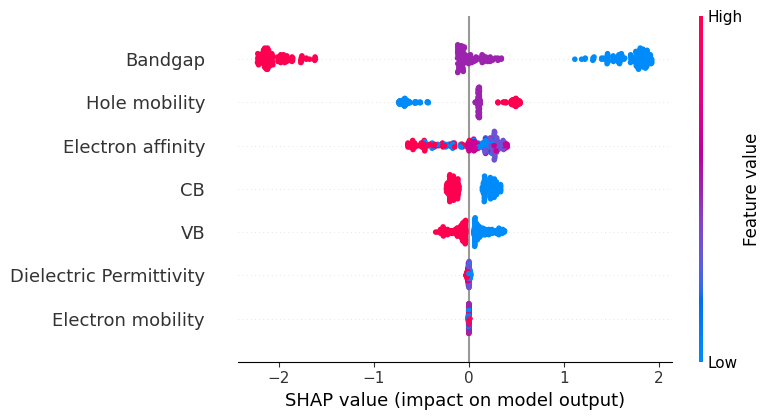

In [ ]:
# SHAP explanation
explainer = shap.Explainer(xg_reg, X_train)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

**LINEAR REGRESSION MODEL**

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
# Assuming your dataset is named 'data.csv'
# Replace 'data.csv' with your actual dataset file name
data = pd.read_csv('/content/Data.csv')

# Assuming the target variable is in a column named 'target'
X = data.drop('PCE', axis=1)
y = data['PCE']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = lr.predict(X_test)

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

# Calculating R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)


RMSE:  1.7528396135628228
R-squared:  0.0011672828546878122


In [ ]:
#K-Fold Cross Validation
cv_score = cross_val_score(lr, X, y, cv = 50)
# Mean Cross Validation Score
cv_score.mean()

-6.6295561129050125

In [ ]:
# Performing k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_val_score(lr, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

# Convert scores to positive
cv_results = np.sqrt(-cv_results)

# Print mean cross-validation score
print("Mean Cross-Validation RMSE: ", cv_results.mean())

Mean Cross-Validation RMSE:  1.6495005041207491


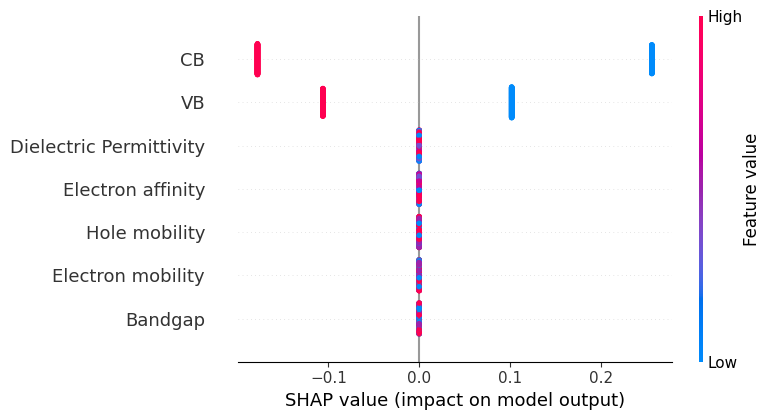

In [ ]:
# SHAP explanation
explainer = shap.Explainer(lr, X_train)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

**Random Forest Regression**

Training RMSE:  0.0014734193827258728
Testing RMSE:  0.004334735367378084
RMSE/std:  0.0024715351387557634
MAE:  0.0023456936895964475
Testing R-squared:  0.9999938915140579


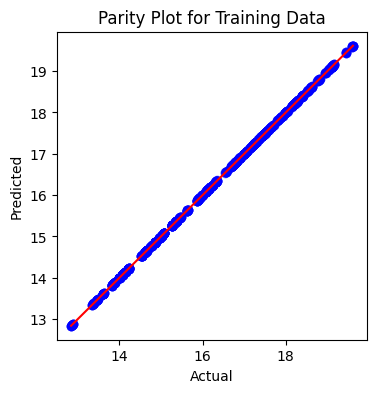

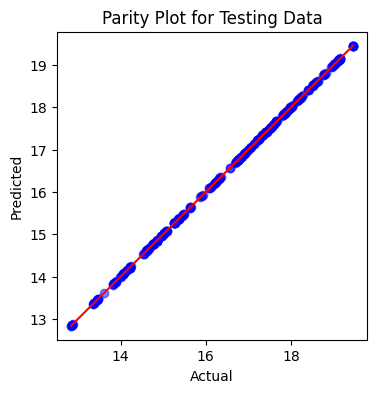

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your dataset
# Assuming your dataset is named 'data.csv'
# Replace 'data.csv' with your actual dataset file name
data = pd.read_csv('/content/Data.csv')

# Assuming the target variable is in a column named 'target'
X = data.drop('PCE', axis=1)
y = data['PCE']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest Regression model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Making predictions on the training set
y_train_pred = rf_reg.predict(X_train)

# Making predictions on the testing set
y_test_pred = rf_reg.predict(X_test)

# Calculating RMSE for training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("Training RMSE: ", rmse_train)

# Calculating RMSE for testing set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Testing RMSE: ", rmse_test)

# Calculating RMSE/std
std_dev = np.std(y_test)
print("RMSE/std: ", rmse_test/std_dev)

# Calculating MAE
mae = mean_absolute_error(y_test, y_test_pred)
print("MAE: ", mae)

# Calculating R-squared for testing set
r2_test = r2_score(y_test, y_test_pred)
print("Testing R-squared: ", r2_test)

# Parity plot for training data
plt.figure(figsize=(4, 4))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')
plt.title('Parity Plot for Training Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Parity plot for testing data
plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Parity Plot for Testing Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [ ]:
#K-Fold Cross Validation
cv_score = cross_val_score(rf_reg, X, y, cv = 50)
# Mean Cross Validation Score
cv_score.mean()

0.9999216897159142

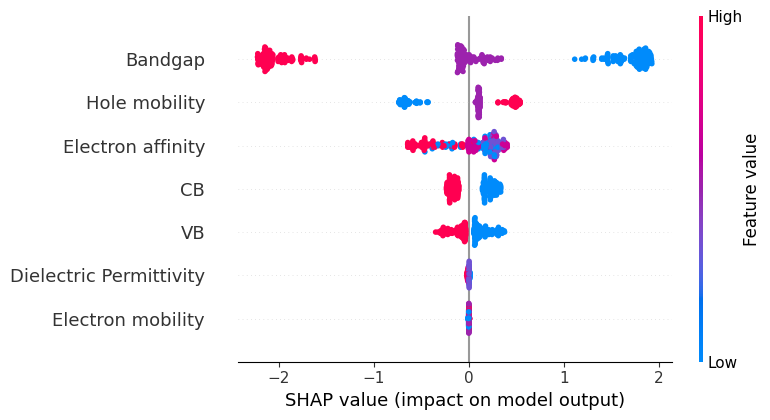

In [ ]:
# SHAP explanation
explainer = shap.Explainer(rf_reg, X_train)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

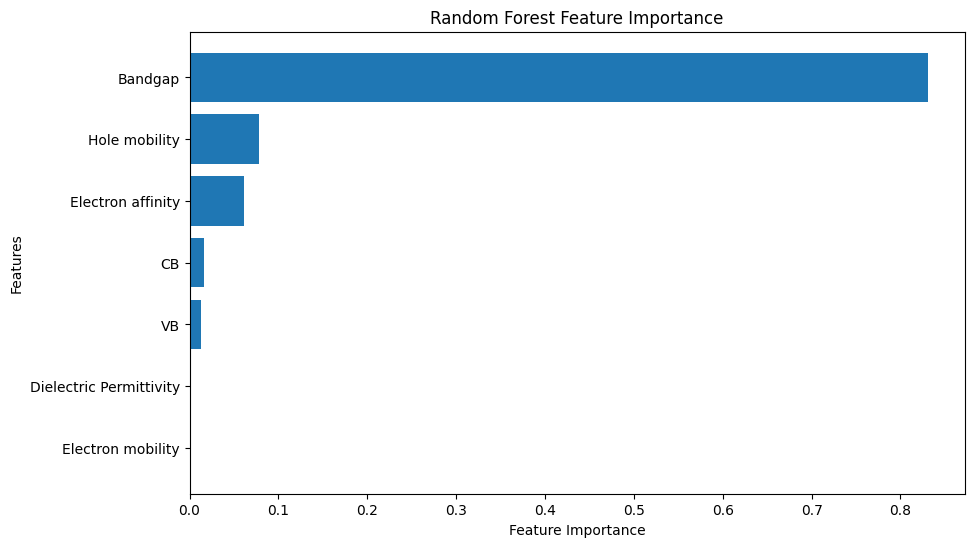

In [ ]:
# Feature importance
feature_importances = rf_reg.feature_importances_
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

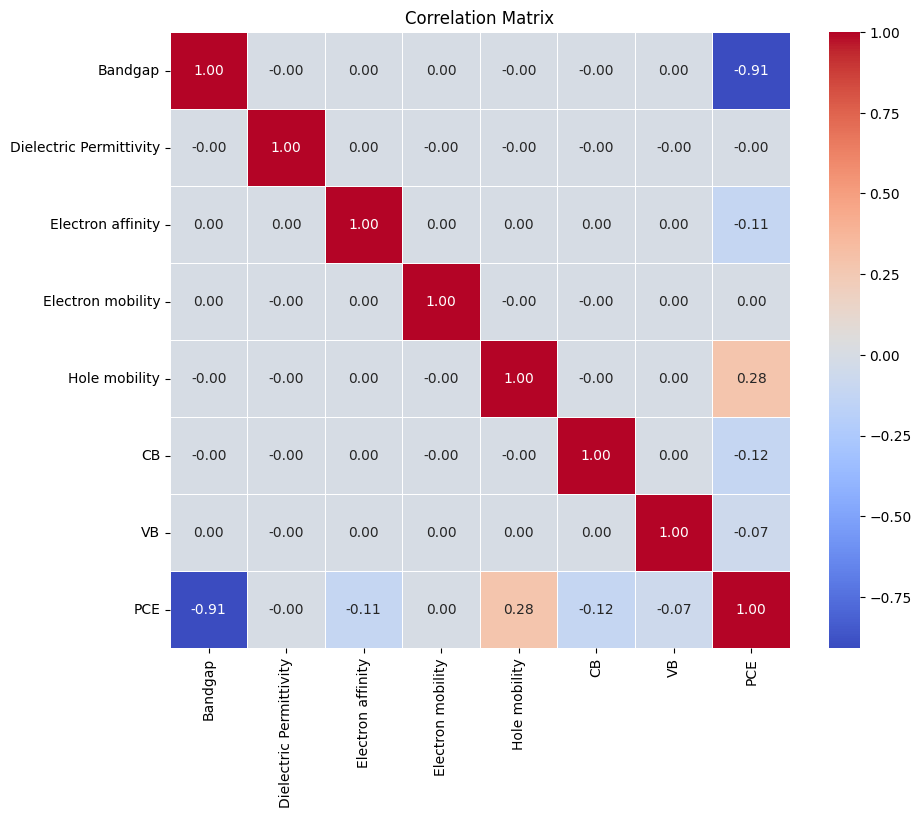

In [ ]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Calculate correlation of features with the target variable
correlation_with_target = data.corr()['PCE'].sort_values(ascending=True)

# Displaying correlation of features with the target variable in tabular format
print("\nCorrelation of Features with the Target Variable:")
print(correlation_with_target)


Correlation of Features with the Target Variable:
Bandgap                   -0.908320
CB                        -0.115841
Electron affinity         -0.112508
VB                        -0.065730
Dielectric Permittivity   -0.004499
Electron mobility          0.000674
Hole mobility              0.279900
PCE                        1.000000
Name: PCE, dtype: float64


**SUPPORT VECTOR REGRESSION MODEL**

In [ ]:
corr=correlation_with_target.abs()

In [ ]:
corr.columns = ['p','n']
print(corr)

Bandgap                    0.908320
CB                         0.115841
Electron affinity          0.112508
VB                         0.065730
Dielectric Permittivity    0.004499
Electron mobility          0.000674
Hole mobility              0.279900
PCE                        1.000000
Name: PCE, dtype: float64


In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load your dataset
# Assuming your dataset is named 'data.csv'
# Replace 'data.csv' with your actual dataset file name
data = pd.read_csv('/content/Data.csv')

# Assuming the target variable is in a column named 'PCE'
X = data.drop('PCE', axis=1)
y = data['PCE']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1))

# Training the Support Vector Regression model
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train_scaled.ravel())

# Making predictions on the testing set
y_pred_scaled = svr.predict(sc_X.transform(X_test))
y_pred_scaled = y_pred_scaled.reshape(-1, 1)  # Reshape to 2D array
y_pred = sc_y.inverse_transform(y_pred_scaled)

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

# Calculating R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)


RMSE:  0.12151770745305415
R-squared:  0.995199488268409


In [ ]:
#K-Fold Cross Validation
cv_score = cross_val_score(svr, X, y, cv = 50)
# Mean Cross Validation Score
cv_score.mean()

-6.946309968314767

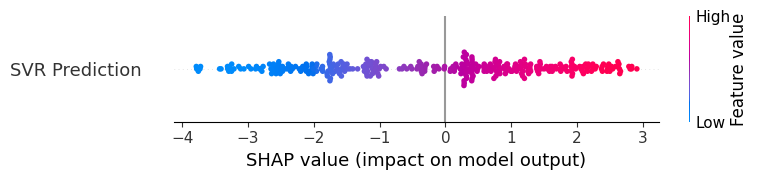

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import shap

# Load your dataset
# Assuming your dataset is named 'data.csv'
# Replace 'data.csv' with your actual dataset file name
data = pd.read_csv('/content/Data.csv')

# Assuming the target variable is in a column named 'PCE'
X = data.drop('PCE', axis=1)
y = data['PCE']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1))

# Training the Support Vector Regression model
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train_scaled.ravel())

# Making predictions on the testing set
y_pred_scaled = svr.predict(sc_X.transform(X_test))
y_pred_scaled = y_pred_scaled.reshape(-1, 1)  # Reshape to 2D array
y_pred = sc_y.inverse_transform(y_pred_scaled)

# Train a linear regression model on the SVR predictions
lr = LinearRegression()
lr.fit(y_pred.reshape(-1, 1), y_test)  # Predictions as input, actual target as output

# SHAP explanation
explainer = shap.Explainer(lr, y_pred)
shap_values = explainer.shap_values(y_pred)

# Plot SHAP summary plot
shap.summary_plot(shap_values, y_pred, feature_names=['SVR Prediction'])


**MLP Regression model**

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load your dataset
# Assuming your dataset is named 'data.csv'
# Replace 'data.csv' with your actual dataset file name
data = pd.read_csv('/content/Data.csv')

# Assuming the target variable is in a column named 'target'
X = data.drop('PCE', axis=1)
y = data['PCE']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the MLP Regression model
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp.fit(X_train_scaled, y_train)

# Making predictions on the testing set
y_pred = mlp.predict(X_test_scaled)

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

# Calculating R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)


RMSE:  0.45657128472637326
R-squared:  0.9322318565776637


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#K-Fold Cross Validation
cv_score = cross_val_score(mlp, X, y, cv = 50)
# Mean Cross Validation Score
cv_score.mean()

-2.3497461223108763e+25